### The company wants to know the following things:

Which variables are significant in predicting the price of a car?

How well do those variables describe the price of a car?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\MADHU\Downloads\CarPrice_Dataset.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### DATA DICTONARY						
						
1	Car_ID			-Unique id of each observation (Interger)		
2	Symboling 			-Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany			-Name of car company (Categorical)		
4	fueltype			-Car fuel type i.e gas or diesel (Categorical)		
5	aspiration			-Aspiration used in a car (Categorical)		
6	doornumber			-Number of doors in a car (Categorical)		
7	carbody			-body of car (Categorical)		
8	drivewheel			-type of drive wheel (Categorical)		
9	enginelocation			-Location of car engine (Categorical)		
10	wheelbase			-Wheelbase of car (Numeric)		
11	carlength			-Length of car (Numeric)		
12	carwidth			-Width of car (Numeric)		
13	carheight			-height of car (Numeric)		
14	curbweight			-The weight of a car without occupants or baggage. (Numeric)		
15	enginetype			-Type of engine. (Categorical)		
16	cylindernumber			-cylinder placed in the car (Categorical)		
17	enginesize			-Size of car (Numeric)		
18	fuelsystem			-Fuel system of car (Categorical)		
19	boreratio			-Bore ratio of car (Numeric)		
20	stroke			-Stroke or volume inside the engine (Numeric)		
21	compressionratio			-compression ratio of car (Numeric)		
22	horsepower			-Horsepower (Numeric)		
23	peakrpm			-car peak rpm (Numeric)		
24	citympg			-Mileage in city (Numeric)		
25	highwaympg			-Mileage on highway (Numeric)		
26	price(Dependent variable)			-Price of car (Numeric)		


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

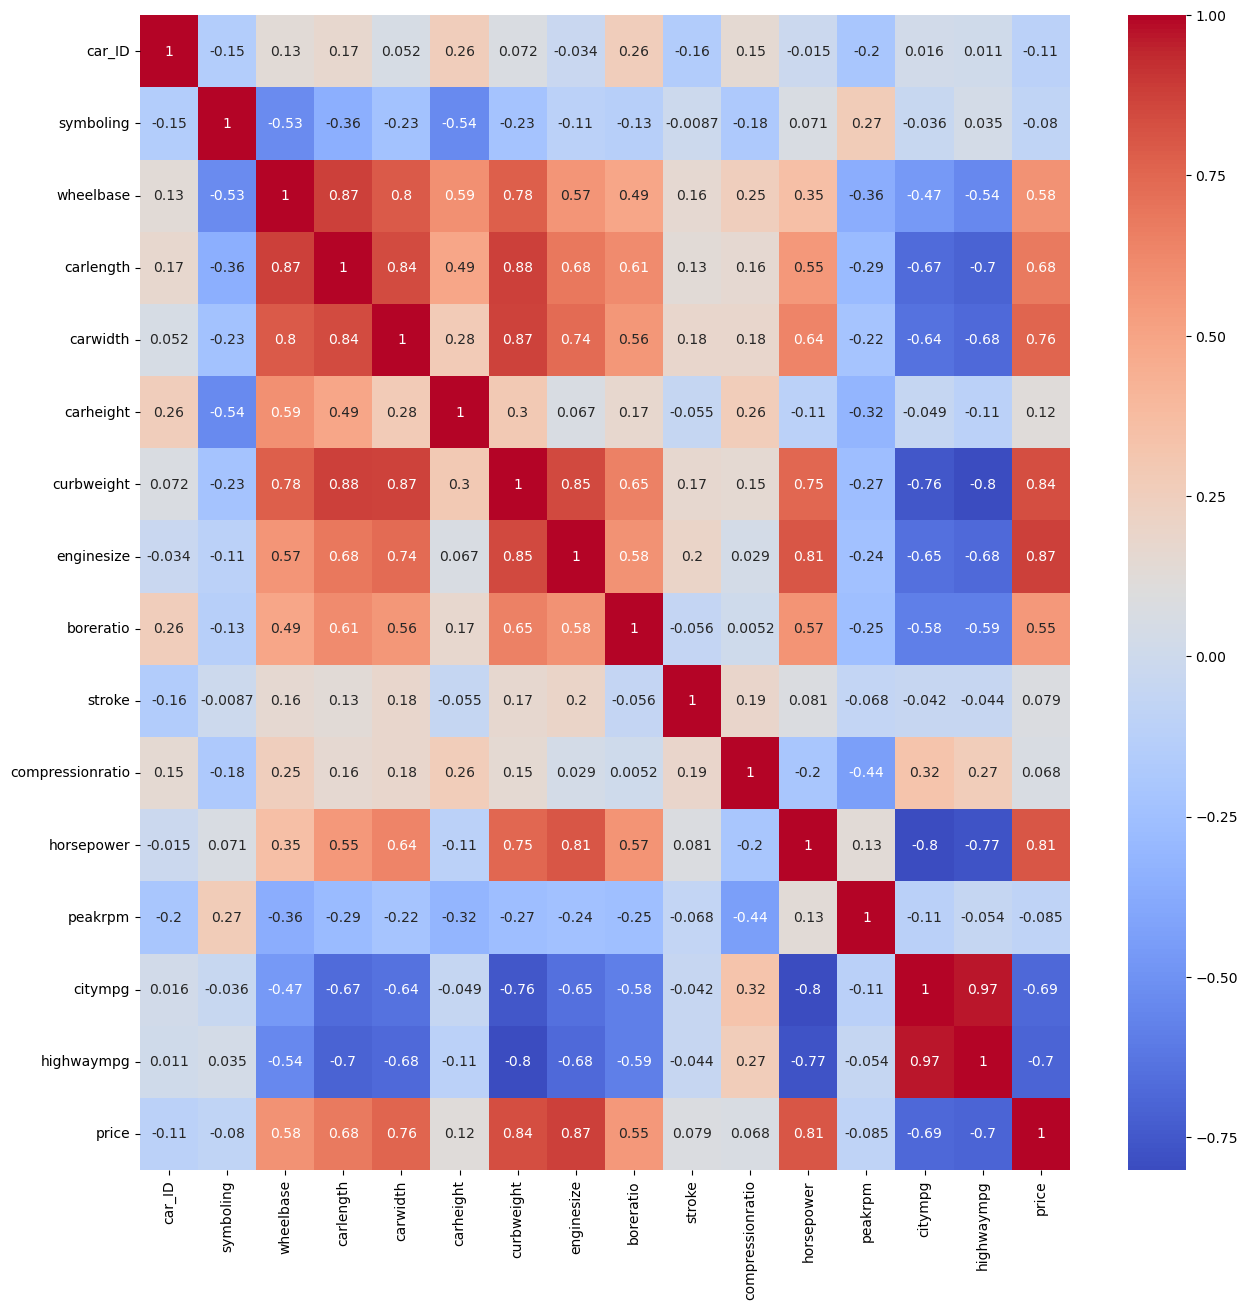

In [6]:
#Creating the figure of the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

 #### most of the columns are highly correlated with eachother.
1.Especially carlength, carwidth, carheight are correlated to engine size and curbweight.
2.average mileage  is correlated to most of the columns.

In [7]:
# the unique Car companies
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
df['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

In [9]:
#df['car_company']=df['CarName'].apply(lambda x : x.split(" ")[0])
#df['car_company']
# Splitting the CarName column to CarCompany and CarModel.
df = df.join(df['CarName'].str.split(' ', 1, expand=True).rename(columns={0:'CarCompany', 1:'CarModel'}))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
df['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarCompany, dtype: int64

 there are many spelling mistakes in the car company names

In [11]:
#Replace the improper company names with proper company names
df.loc[(df['CarCompany']=='vw'),'CarCompany' ] = 'volkswagen'
df.loc[(df['CarCompany']=='vokswagen'),'CarCompany' ] = 'volkswagen'
df.loc[(df['CarCompany']=='toyouta'),'CarCompany' ] = 'toyota'
df.loc[(df['CarCompany']=='Nissan'),'CarCompany' ] = 'nissan'
df.loc[(df['CarCompany']=='porcshce'),'CarCompany' ] = 'porsche'
df.loc[(df['CarCompany']=='maxda'),'CarCompany' ] = 'mazda'

In [12]:
df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [13]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df=df.drop('CarName',axis=1)

In [15]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [16]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [17]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [18]:
# Get the observations of fueltype column
print(df['fueltype'].unique())
print(df['fueltype'].value_counts())

['gas' 'diesel']
gas       185
diesel     20
Name: fueltype, dtype: int64


In [19]:
#Get the observations of aspiration column
print(df['aspiration'].unique())
print(df['aspiration'].value_counts())

['std' 'turbo']
std      168
turbo     37
Name: aspiration, dtype: int64


In [20]:
#Get the observations of doornumber column
print(df['doornumber'].unique())
print(df['doornumber'].value_counts())
df['doornumber'].describe()

['two' 'four']
four    115
two      90
Name: doornumber, dtype: int64


count      205
unique       2
top       four
freq       115
Name: doornumber, dtype: object

In [21]:
df['doornumber'] = df['doornumber'].map({'four': 4,'two':2})

In [22]:
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [23]:
#Get the observations of carbody column
print(df['carbody'].unique())
df['carbody'].value_counts()

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [24]:
#Get the observations of drivewheel column

print(df['drivewheel'].unique())
df['drivewheel'].value_counts()

['rwd' 'fwd' '4wd']


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
#Get the observations of enginelocation column

print(df['enginelocation'].unique())
df['enginelocation'].value_counts()


['front' 'rear']


front    202
rear       3
Name: enginelocation, dtype: int64

In [26]:
#Get the observations of engine type 
print(df['enginetype'].unique())
df['enginetype'].value_counts()


['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [27]:
#Get the observations of cylinders

print(df['cylindernumber'].unique())
df['cylindernumber'].value_counts()

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [28]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [29]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [30]:
# observations of fuelsystem 

print(df['fuelsystem'].unique())
df['fuelsystem'].value_counts()

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


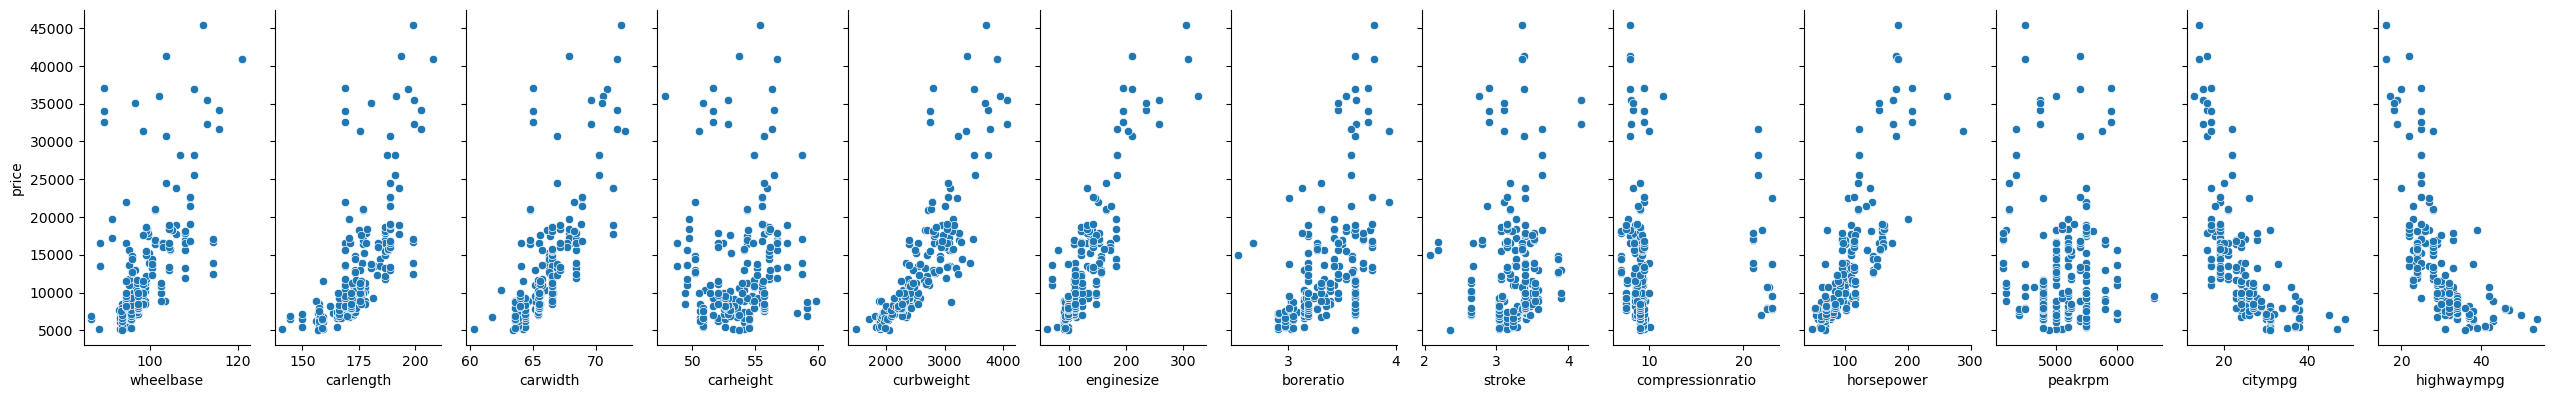

In [31]:
#Pair plots with numerical columns
sns.pairplot(df, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
'peakrpm',           
'citympg',             
'highwaympg'], y_vars='price', size=4, aspect=.5,kind='scatter')

In [32]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [33]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany',
       'CarModel'],
      dtype='object')

In [34]:
#feature enginering
# volume of the car with carlength, carwidth, carheight
df['volume_car'] = df['carlength'] * df['carwidth'] * df['carheight']

In [35]:
#the average milage metric - average of city and highway mileage
df['avg_mileage'] = (df['citympg'] + df['highwaympg'])/2

In [36]:
# area car - carlength & carwidth 
df['area_car'] = df['carlength'] * df['carwidth']

In [37]:
#curbweight to car volume ratio
#ratio indicates how much weight is present per unit volume of the car.
df['weight_volume_ratio'] = df['curbweight'] / df['volume_car']

In [38]:
#Create enzine size to power ratio
#ratio indicates the amount of power generated per unit of engine size.
df['enginesize_power_ratio'] = df['horsepower'] / df['enginesize']

In [39]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,citympg,highwaympg,price,CarCompany,CarModel,volume_car,avg_mileage,area_car,weight_volume_ratio,enginesize_power_ratio
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,alfa-romero,giulia,528019.904,24.0,10820.08,0.004826,0.853846
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,alfa-romero,stelvio,528019.904,24.0,10820.08,0.004826,0.853846
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,alfa-romero,Quadrifoglio,587592.640,22.5,11213.60,0.004804,1.013158
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,audi,100 ls,634816.956,27.0,11690.92,0.003681,0.935780
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,audi,100ls,636734.832,20.0,11726.24,0.004435,0.845588


In [40]:
df_categorical=df.select_dtypes(include=['object'])

In [41]:
df_categorical

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany,CarModel
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,giulia
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,stelvio
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,Quadrifoglio
3,gas,std,sedan,fwd,front,ohc,mpfi,audi,100 ls
4,gas,std,sedan,4wd,front,ohc,mpfi,audi,100ls
...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo,145e (sw)
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo,144ea
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo,244dl
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo,246


In [42]:
df_categorical['doornumber'] = df['doornumber']
df_categorical['symboling'] = df['symboling']

In [43]:
df_categorical

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany,CarModel,doornumber,symboling
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,giulia,2,3
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,stelvio,2,3
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,Quadrifoglio,2,1
3,gas,std,sedan,fwd,front,ohc,mpfi,audi,100 ls,4,2
4,gas,std,sedan,4wd,front,ohc,mpfi,audi,100ls,4,2
...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo,145e (sw),4,-1
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo,144ea,4,-1
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo,244dl,4,-1
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo,246,4,-1


In [44]:
df_categorical.drop('CarModel', axis = 1, inplace = True)

In [45]:
df_categorical

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany,doornumber,symboling
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,2,3
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,2,3
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,2,1
3,gas,std,sedan,fwd,front,ohc,mpfi,audi,4,2
4,gas,std,sedan,4wd,front,ohc,mpfi,audi,4,2
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo,4,-1
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo,4,-1
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo,4,-1
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo,4,-1


E:\Anaconda_python_programfiles\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


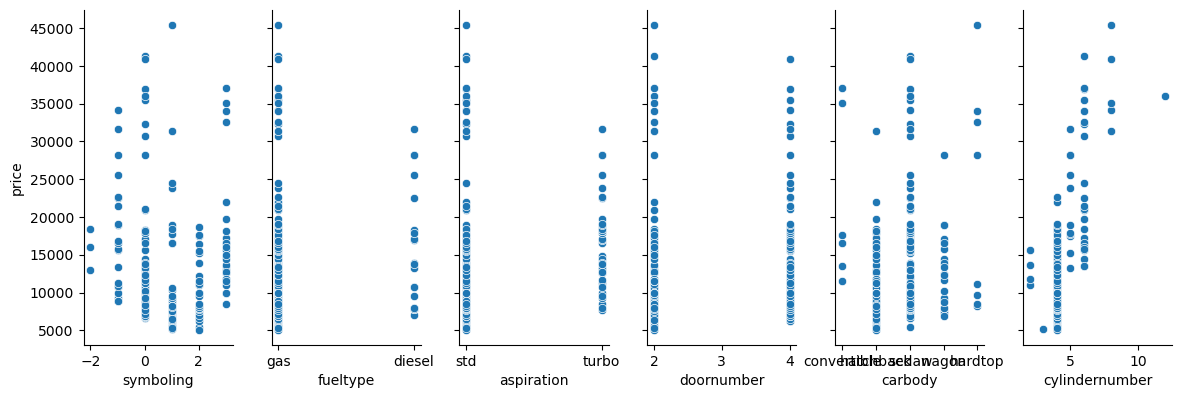

In [46]:
#Pair plots with categorical columns
sns.pairplot(df, x_vars=['symboling','fueltype','aspiration','doornumber','carbody','cylindernumber'], y_vars='price', size=4, aspect=0.5,kind='scatter')

In [47]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [48]:
df_dummies

,doornumber,symboling,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,2,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,-1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
201,4,-1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
202,4,-1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
203,4,-1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df=df.drop(list(df_categorical.columns),axis=1)

In [50]:
df.shape

(205, 22)

In [51]:
df= pd.concat([df,df_dummies],axis=1)

In [52]:
df

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
201,202,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
202,203,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,0,0,0,0,0,0,0,0,0,1
203,204,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   cylindernumber          205 non-null    int64  
 7   enginesize              205 non-null    int64  
 8   boreratio               205 non-null    float64
 9   stroke                  205 non-null    float64
 10  compressionratio        205 non-null    float64
 11  horsepower              205 non-null    int64  
 12  peakrpm                 205 non-null    int64  
 13  citympg                 205 non-null    int64  
 14  highwaympg              205 non-null    in

In [54]:
df.drop('CarModel', axis =1, inplace = True)
df.drop('car_ID', axis =1, inplace = True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    int64  
 5   cylindernumber          205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  citympg                 205 non-null    int64  
 13  highwaympg              205 non-null    int64  
 14  price                   205 non-null    fl

In [56]:
df.isnull().sum().unique()

array([0], dtype=int64)

In [57]:
#model
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'volume_car', 'avg_mileage', 'area_car', 'weight_volume_ratio',
       'enginesize_power_ratio', 'doornumber', 'symboling', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarC

In [58]:
#vlist = df.drop('price', axis= 1).columns
#vlist
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[vlist]= scaler.fit_transform(df[vlist])

In [59]:
# modeling
X = df.drop('price', axis=1)
y = df['price']

In [60]:
X.shape

(205, 64)

In [61]:
y.shape

(205,)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=500)
vlist = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'volume_car', 'avg_mileage', 'area_car', 'weight_volume_ratio',
       'enginesize_power_ratio', 'doornumber', 'symboling']
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train[vlist]= scaler.fit_transform(X_train[vlist])
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
lr.coef_

array([ 6.13856850e+03, -8.98043305e+04, -3.91655425e+04,  1.68995399e+04,
        1.94981975e+04, -1.93124789e+04,  5.88846125e+04, -1.02374781e+04,
       -7.96275331e+03, -7.42321075e+03, -1.80065812e+04,  3.28388739e+03,
       -3.47609773e+03,  5.20591316e+03, -5.83691906e+04,  9.95687421e+02,
        1.74772715e+05, -6.87142992e+03,  9.55780039e+03,  9.59016335e+02,
        2.22623878e+03, -3.93882859e+03,  2.21779910e+03, -3.12703953e+03,
       -3.56354777e+03, -3.18301345e+03, -3.39708124e+03, -1.81102867e+02,
        5.73731070e+01,  7.03793657e+03,  7.23629167e+03,  6.34817786e+02,
        7.78050047e+02,  2.94536733e+03, -1.28720800e+03,  1.60499065e+03,
        2.59778741e+03,  1.60499065e+03,  3.93882859e+03, -5.72981662e-11,
        2.51111429e+03,  1.21075618e+03,  2.84598768e+03, -3.31230763e+02,
        5.73827631e+03,  2.10946324e+03, -3.18691530e+03, -3.55652167e+03,
        1.76621538e+02, -1.38197740e+03, -3.07538128e+03, -1.15183593e+03,
       -1.14125685e+03, -

In [64]:
import statsmodels.api as sm                        
X_train = sm.add_constant(X_train)# Adding a constant variable
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr1 = sm.OLS(y_train,X_train).fit() 
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     74.33
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.38e-64
Time:                        00:12:21   Log-Likelihood:                -1395.3
No. Observations:                 164   AIC:                             2911.
Df Residuals:                     104   BIC:                             3097.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2715.6799   4866.294      0.558      0.578   -6934.363    1.24e+04
wheelbase               6138.5685   3074.893      1.996      0.049      40.941    1.22e+04
carlength               -8.98e+04   4.81e+04     -1.866      0.065   -1.85e+05    5629.757
carwidth               -3.917e+04   2.62e+04     -1.495      0.138   -9.11e+04    1.28e+04
carheight                1.69e+04   1.37e+04      1.233      0.221   -1.03e+04    4.41e+04
curbweight               1.95e+04   2.69e+04      0.726      0.470   -3.38e+04    7.28e+04
cylindernumber         -1.931e+04   1.12e+04     -1.724      0.088   -4.15e+04    2896.732
enginesize              5.888e+04   1.37e+04      4.292      0.000    3.17e+04    8.61e+04
boreratio              -1.024e+04   4111.614     -2.490      0.014   -1.84e+04   -2083.993
stroke                 -7962.7533   3784.043     -2.104      0.038   -1.55e+04    -458.854
compressionratio       -7423.2107   6337.867     -1.171      0.244      -2e+04    5145.017
horsepower             -1.801e+04   1.26e+04     -1.429      0.156    -4.3e+04    6988.449
peakrpm                 3283.8874   1667.114      1.970      0.052     -22.062    6589.837
citympg                -3463.9817   4739.423     -0.731      0.466   -1.29e+04    5934.472
highwaympg              5218.7023   4356.056      1.198      0.234   -3419.519    1.39e+04
volume_car             -5.837e+04   4.43e+04     -1.317      0.191   -1.46e+05    2.95e+04
avg_mileage              971.1187    899.948      1.079      0.283    -813.512    2755.749
area_car                1.748e+05   9.54e+04      1.832      0.070   -1.45e+04    3.64e+05
weight_volume_ratio    -6871.4299   1.84e+04     -0.374      0.709   -4.33e+04    2.96e+04
enginesize_power_ratio  9557.8004   7127.661      1.341      0.183   -4576.619    2.37e+04
doornumber               959.0163    479.366      2.001      0.048       8.416    1909.616
symboling               2226.2388   1459.620      1.525      0.130    -668.242    5120.720
fueltype_gas           -2580.9886   3127.644     -0.825      0.411   -8783.224    3621.247
aspiration_turbo        2217.7991    963.455      2.302      0.023     307.232    4128.367
carbody_hardtop        -3127.0395   1160.425     -2.695      0.008   -5428.207    -825.872
carbody_hatchback      -3563.5478   1032.158     -3.453      0.001   -5610.355   -1516.741
carbody_sedan          -3183.0134   1149.033     -2.770      0.007   -5461.590    -904.437
carbody_wagon          -3397.0812   1264.877     -2.686      0.008   -5905.379    -888.783
drivewheel_fwd          -181.1029    829.537     -0.218      0.828   -1826.105    1463.899
drivewheel_rwd            57.3731   1079.439      0.053      0.958   -2083.194    2197.941
enginelocation_rear     7037.9366   2298.300      3.062      0.003    2480.322  

In [65]:
lr2=LinearRegression()
from sklearn.feature_selection import RFE 
rfe1= RFE(lr2,n_features_to_select=20)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [66]:
rfe1.ranking_

array([43, 10,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1, 13, 14, 15,  1, 37,
        1, 28,  1, 36, 20,  6, 16,  1,  1,  1,  1, 45, 41,  1,  4, 44, 39,
        3, 19, 30, 24, 32,  9, 46, 25, 35, 23, 40,  1,  1, 22, 18, 42, 33,
       26, 34, 38, 12, 31, 11, 17,  1, 29,  5,  2, 27, 21,  8])

In [67]:
#from sklearn.metrics import r2_score
#y_pred=lr.predict(X_test)
#r2_score(y_test,y_pred)
X_train.columns[rfe1.support_]   

Index(['carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'volume_car',
       'area_car', 'enginesize_power_ratio', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'CarCompany_bmw', 'CarCompany_buick',
       'CarCompany_porsche'],
      dtype='object')

In [68]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = X_train[X_train.columns[rfe1.support_]]
X_train_rfe.head()

,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,horsepower,volume_car,area_car,enginesize_power_ratio,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,CarCompany_bmw,CarCompany_buick,CarCompany_porsche
112,0.741463,0.675000,0.741667,0.684251,0.2,0.343396,0.809524,0.640884,0.195833,0.737387,0.708190,0.124131,0,0,1,0,0,0,0,0
160,0.409756,0.341667,0.433333,0.235066,0.2,0.139623,0.404762,0.370166,0.091667,0.312339,0.365795,0.219750,0,0,1,0,0,0,0,0
6,0.839024,0.925000,0.658333,0.525989,0.3,0.283019,0.404762,0.574586,0.258333,0.852272,0.872445,0.320993,0,0,1,0,0,0,0,0
127,0.452033,0.391667,0.316667,0.491854,0.4,0.501887,0.841270,0.298343,0.662500,0.309284,0.410457,0.597494,1,0,0,0,1,0,0,1
136,0.739837,0.516667,0.691667,0.512025,0.2,0.226415,0.682540,0.392265,0.466667,0.661495,0.648141,0.870907,0,1,0,0,0,0,0,0


In [69]:
#from sklearn.metrics import r2_score
#y_pred=lr.predict(X_test)
#r2_score(y_test,y_pred)
X_train_rfe = sm.add_constant(X_train_rfe)# Adding a constant variable

In [70]:
X_train_rfe.head()

,const,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,horsepower,...,area_car,enginesize_power_ratio,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,CarCompany_bmw,CarCompany_buick,CarCompany_porsche
112,1.0,0.741463,0.675000,0.741667,0.684251,0.2,0.343396,0.809524,0.640884,0.195833,...,0.708190,0.124131,0,0,1,0,0,0,0,0
160,1.0,0.409756,0.341667,0.433333,0.235066,0.2,0.139623,0.404762,0.370166,0.091667,...,0.365795,0.219750,0,0,1,0,0,0,0,0
6,1.0,0.839024,0.925000,0.658333,0.525989,0.3,0.283019,0.404762,0.574586,0.258333,...,0.872445,0.320993,0,0,1,0,0,0,0,0
127,1.0,0.452033,0.391667,0.316667,0.491854,0.4,0.501887,0.841270,0.298343,0.662500,...,0.410457,0.597494,1,0,0,0,1,0,0,1
136,1.0,0.739837,0.516667,0.691667,0.512025,0.2,0.226415,0.682540,0.392265,0.466667,...,0.648141,0.870907,0,1,0,0,0,0,0,0


In [71]:
# linear model
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Let's see the summary of our linear model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           4.01e-91
Time:                        00:12:23   Log-Likelihood:                -1435.6
No. Observations:                 164   AIC:                             2913.
Df Residuals:                     143   BIC:                             2978.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4918.2636   4239.592      1.160      0.248   -3462.104    1.33e+04
carlength              -1.368e+05   2.44e+04     -5.614      0.000   -1.85e+05   -8.87e+04
carwidth               -6.261e+04   1.34e+04     -4.668      0.000   -8.91e+04   -3.61e+04
carheight               1.949e+04   8931.138      2.182      0.031    1837.889    3.71e+04
curbweight              8049.5952   2405.874      3.346      0.001    3293.922    1.28e+04
cylindernumber          -1.93e+04   6737.765     -2.865      0.005   -3.26e+04   -5986.347
enginesize              3.854e+04   6690.346      5.760      0.000    2.53e+04    5.18e+04
boreratio              -7962.9457   2205.908     -3.610      0.000   -1.23e+04   -3602.544
stroke                 -5701.3117   1881.813     -3.030      0.003   -9421.076   -1981.547
horsepower             -3550.3649   6481.440     -0.548      0.585   -1.64e+04    9261.446
volume_car             -5.233e+04   2.45e+04     -2.136      0.034   -1.01e+05   -3907.356
area_car                2.506e+05   5.05e+04      4.965      0.000    1.51e+05     3.5e+05
enginesize_power_ratio  8100.4163   3111.496      2.603      0.010    1949.947    1.43e+04
carbody_hardtop        -3057.0957   1101.850     -2.775      0.006   -5235.114    -879.077
carbody_hatchback      -4052.7664    875.318     -4.630      0.000   -5783.001   -2322.531
carbody_sedan          -2936.0213    893.855     -3.285      0.001   -4702.898   -1169.145
carbody_wagon          -4155.9549    978.865     -4.246      0.000   -6090.870   -2221.040
enginelocation_rear     7730.9279   2041.070      3.788      0.000    3696.362    1.18e+04
CarCompany_bmw          7826.2899    786.552      9.950      0.000    6271.519    9381.061
CarCompany_buick        4761.7411   1021.125      4.663      0.000    2743.292    6780.190
CarCompany_porsche      8197.9820   1560.802      5.252      0.000    5112.757    1.13e+04
==============================================================================
Omnibus:                        8.889   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               12.869
Skew:                           0.299   Prob(JB):                      0.00161
Kurtosis:                       4.236   Cond. No.                         896.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# VIF
vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif["VIF"]= [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]

In [73]:
vif["VIF"]= round(vif["VIF"], 2)
vif.sort_values(by = "VIF", ascending= False )

,features,VIF
11,area_car,5716.48
10,volume_car,1660.08
1,carlength,1462.21
0,const,1094.04
2,carwidth,355.21
3,carheight,190.46
9,horsepower,71.89
6,enginesize,65.54
5,cylindernumber,32.93
12,enginesize_power_ratio,20.06


there are many features which have high vif 

In [74]:
#model 2
lr2=LinearRegression()
from sklearn.feature_selection import RFE 
rfe3 =RFE(lr2,n_features_to_select=10)
rfe3.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [75]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe1 = X_train[X_train.columns[rfe3.support_]]
X_train_rfe1.head()

,carlength,carwidth,carheight,curbweight,enginesize,stroke,volume_car,area_car,enginelocation_rear,CarCompany_bmw
112,0.741463,0.675000,0.741667,0.684251,0.343396,0.640884,0.737387,0.708190,0,0
160,0.409756,0.341667,0.433333,0.235066,0.139623,0.370166,0.312339,0.365795,0,0
6,0.839024,0.925000,0.658333,0.525989,0.283019,0.574586,0.852272,0.872445,0,0
127,0.452033,0.391667,0.316667,0.491854,0.501887,0.298343,0.309284,0.410457,1,0
136,0.739837,0.516667,0.691667,0.512025,0.226415,0.392265,0.661495,0.648141,0,0


In [76]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)# Adding a constant variable
X_train_rfe1.head()

,const,carlength,carwidth,carheight,curbweight,enginesize,stroke,volume_car,area_car,enginelocation_rear,CarCompany_bmw
112,1.0,0.741463,0.675000,0.741667,0.684251,0.343396,0.640884,0.737387,0.708190,0,0
160,1.0,0.409756,0.341667,0.433333,0.235066,0.139623,0.370166,0.312339,0.365795,0,0
6,1.0,0.839024,0.925000,0.658333,0.525989,0.283019,0.574586,0.852272,0.872445,0,0
127,1.0,0.452033,0.391667,0.316667,0.491854,0.501887,0.298343,0.309284,0.410457,1,0
136,1.0,0.739837,0.516667,0.691667,0.512025,0.226415,0.392265,0.661495,0.648141,0,0


In [77]:
# linear model
lr4 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           9.08e-80
Time:                        00:12:24   Log-Likelihood:                -1493.9
No. Observations:                 164   AIC:                             3010.
Df Residuals:                     153   BIC:                             3044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2695.7732   4954.946     -0.544      0.587   -1.25e+04    7093.171
carlength           -1.744e+05   2.98e+04     -5.850      0.000   -2.33e+05   -1.16e+05
carwidth            -7.534e+04   1.63e+04     -4.619      0.000   -1.08e+05   -4.31e+04
carheight            2.137e+04   1.15e+04      1.864      0.064   -1282.031     4.4e+04
curbweight           1.385e+04   2768.618      5.001      0.000    8375.931    1.93e+04
enginesize           1.315e+04   3216.384      4.089      0.000    6796.483    1.95e+04
stroke              -1979.6351   1186.202     -1.669      0.097   -4323.084     363.814
volume_car          -6.391e+04   3.12e+04     -2.050      0.042   -1.25e+05   -2316.237
area_car             3.111e+05   6.47e+04      4.810      0.000    1.83e+05    4.39e+05
enginelocation_rear  1.897e+04   1831.873     10.354      0.000    1.53e+04    2.26e+04
CarCompany_bmw       8420.4749   1027.098      8.198      0.000    6391.350    1.04e+04
==============================================================================
Omnibus:                        7.679   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.140
Skew:                           0.391   Prob(JB):                       0.0171
Kurtosis:                       3.762   Cond. No.                         728.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# VIF
vif1 = pd.DataFrame()
vif1["features"] = X_train_rfe1.columns
vif1["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [79]:
vif1["VIF"]= round(vif1["VIF"], 2)
vif1.sort_values(by = "VIF", ascending= False )

,features,VIF
8,area_car,4929.55
7,volume_car,1412.28
1,carlength,1149.44
0,const,785.07
2,carwidth,275.99
3,carheight,164.84
4,curbweight,10.50
5,enginesize,7.96
9,enginelocation_rear,1.29
10,CarCompany_bmw,1.19


there are high vif in the features , so have to drop it

In [80]:
fd = ["area_car"]
X_train_rfe1.drop(fd,axis = 1, inplace= True)

In [81]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)# Adding a constant variable
X_train_rfe1.head()

,const,carlength,carwidth,carheight,curbweight,enginesize,stroke,volume_car,enginelocation_rear,CarCompany_bmw
112,1.0,0.741463,0.675000,0.741667,0.684251,0.343396,0.640884,0.737387,0,0
160,1.0,0.409756,0.341667,0.433333,0.235066,0.139623,0.370166,0.312339,0,0
6,1.0,0.839024,0.925000,0.658333,0.525989,0.283019,0.574586,0.852272,0,0
127,1.0,0.452033,0.391667,0.316667,0.491854,0.501887,0.298343,0.309284,1,0
136,1.0,0.739837,0.516667,0.691667,0.512025,0.226415,0.392265,0.661495,0,0


In [82]:
# linear model
lr5 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.02e-76
Time:                        00:12:24   Log-Likelihood:                -1505.5
No. Observations:                 164   AIC:                             3031.
Df Residuals:                     154   BIC:                             3062.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.222e+04   4132.733      2.957      0.004    4057.080    2.04e+04
carlength           -4.076e+04   1.15e+04     -3.529      0.001   -6.36e+04   -1.79e+04
carwidth            -3575.5559   7051.580     -0.507      0.613   -1.75e+04    1.04e+04
carheight            -2.21e+04   7544.154     -2.929      0.004    -3.7e+04   -7193.184
curbweight           1.178e+04   2925.146      4.028      0.000    6003.528    1.76e+04
enginesize           2.146e+04   2901.294      7.397      0.000    1.57e+04    2.72e+04
stroke              -2641.4679   1260.024     -2.096      0.038   -5130.630    -152.306
volume_car           5.768e+04   1.95e+04      2.956      0.004    1.91e+04    9.62e+04
enginelocation_rear  1.641e+04   1874.857      8.753      0.000    1.27e+04    2.01e+04
CarCompany_bmw       7487.7743   1078.680      6.942      0.000    5356.856    9618.693
==============================================================================
Omnibus:                        1.321   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.932
Skew:                           0.139   Prob(JB):                        0.627
Kurtosis:                       3.244   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# VIF
vif1 = pd.DataFrame()
vif1["features"] = X_train_rfe1.columns
vif1["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [84]:
vif1["VIF"]= round(vif1["VIF"], 2)
vif1.sort_values(by = "VIF", ascending= False )

,features,VIF
7,volume_car,483.76
0,const,477.51
1,carlength,150.74
3,carheight,62.42
2,carwidth,45.09
4,curbweight,10.25
5,enginesize,5.66
8,enginelocation_rear,1.18
9,CarCompany_bmw,1.15
6,stroke,1.12


In [85]:
fd = ["carlength"]
X_train_rfe1.drop(fd,axis = 1, inplace= True)

In [86]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)# Adding a constant variable
X_train_rfe1.head()

,const,carwidth,carheight,curbweight,enginesize,stroke,volume_car,enginelocation_rear,CarCompany_bmw
112,1.0,0.675000,0.741667,0.684251,0.343396,0.640884,0.737387,0,0
160,1.0,0.341667,0.433333,0.235066,0.139623,0.370166,0.312339,0,0
6,1.0,0.925000,0.658333,0.525989,0.283019,0.574586,0.852272,0,0
127,1.0,0.391667,0.316667,0.491854,0.501887,0.298343,0.309284,1,0
136,1.0,0.516667,0.691667,0.512025,0.226415,0.392265,0.661495,0,0


In [87]:
# linear model
lr5 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           8.39e-75
Time:                        00:12:25   Log-Likelihood:                -1511.9
No. Observations:                 164   AIC:                             3042.
Df Residuals:                     155   BIC:                             3070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1776.7573   1204.073     -1.476      0.142   -4155.267     601.752
carwidth             1.887e+04   3154.363      5.984      0.000    1.26e+04    2.51e+04
carheight            3187.6105   2451.248      1.300      0.195   -1654.552    8029.774
curbweight           1.141e+04   3029.321      3.765      0.000    5422.455    1.74e+04
enginesize           1.986e+04   2969.559      6.687      0.000     1.4e+04    2.57e+04
stroke              -2416.4539   1304.090     -1.853      0.066   -4992.536     159.628
volume_car          -9696.1919   4193.083     -2.312      0.022    -1.8e+04   -1413.229
enginelocation_rear  1.695e+04   1936.496      8.752      0.000    1.31e+04    2.08e+04
CarCompany_bmw       7694.4344   1116.187      6.893      0.000    5489.533    9899.336
==============================================================================
Omnibus:                        6.678   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.484
Skew:                           0.397   Prob(JB):                       0.0391
Kurtosis:                       3.564   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# VIF
vif2 = pd.DataFrame()
vif2["features"] = X_train_rfe1.columns
vif2["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [89]:
vif2["VIF"]= round(vif2["VIF"], 2)
vif2.sort_values(by = "VIF", ascending= False )

,features,VIF
0,const,37.74
6,volume_car,20.80
3,curbweight,10.23
1,carwidth,8.40
2,carheight,6.14
4,enginesize,5.52
7,enginelocation_rear,1.18
8,CarCompany_bmw,1.14
5,stroke,1.12


In [90]:
fd = ["volume_car"]
X_train_rfe1.drop(fd,axis = 1, inplace= True)

In [91]:
#X_train_rfe1 = sm.add_constant(X_train_rfe1)# Adding a constant variable
X_train_rfe1.head()

,const,carwidth,carheight,curbweight,enginesize,stroke,enginelocation_rear,CarCompany_bmw
112,1.0,0.675000,0.741667,0.684251,0.343396,0.640884,0,0
160,1.0,0.341667,0.433333,0.235066,0.139623,0.370166,0,0
6,1.0,0.925000,0.658333,0.525989,0.283019,0.574586,0,0
127,1.0,0.391667,0.316667,0.491854,0.501887,0.298343,1,0
136,1.0,0.516667,0.691667,0.512025,0.226415,0.392265,0,0


In [92]:
# linear model
lr6 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           7.78e-75
Time:                        00:12:26   Log-Likelihood:                -1514.6
No. Observations:                 164   AIC:                             3045.
Df Residuals:                     156   BIC:                             3070.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  79.3064    909.943      0.087      0.931   -1718.092    1876.705
carwidth             1.374e+04   2273.333      6.046      0.000    9253.846    1.82e+04
carheight           -1797.2512   1183.039     -1.519      0.131   -4134.092     539.590
curbweight           7974.9946   2677.502      2.979      0.003    2686.158    1.33e+04
enginesize           2.067e+04   2989.495      6.915      0.000    1.48e+04    2.66e+04
stroke              -2657.8545   1317.893     -2.017      0.045   -5261.072     -54.637
enginelocation_rear  1.706e+04   1962.654      8.693      0.000    1.32e+04    2.09e+04
CarCompany_bmw       7337.1444   1120.738      6.547      0.000    5123.364    9550.925
==============================================================================
Omnibus:                        3.092   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.624
Skew:                           0.278   Prob(JB):                        0.269
Kurtosis:                       3.272   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# VIF
vif3 = pd.DataFrame()
vif3["features"] = X_train_rfe1.columns
vif3["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [94]:
vif3["VIF"]= round(vif3["VIF"], 2)
vif3.sort_values(by = "VIF", ascending= False )

,features,VIF
0,const,20.97
3,curbweight,7.78
4,enginesize,5.45
1,carwidth,4.25
2,carheight,1.39
6,enginelocation_rear,1.18
7,CarCompany_bmw,1.12
5,stroke,1.11


In [95]:
fd = ["curbweight"]
X_train_rfe1.drop(fd,axis = 1, inplace= True)

In [96]:
# linear model
lr7 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.67e-74
Time:                        00:12:26   Log-Likelihood:                -1519.2
No. Observations:                 164   AIC:                             3052.
Df Residuals:                     157   BIC:                             3074.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -582.6854    904.232     -0.644      0.520   -2368.714    1203.343
carwidth             1.743e+04   1953.289      8.926      0.000    1.36e+04    2.13e+04
carheight            -395.2171   1112.236     -0.355      0.723   -2592.094    1801.660
enginesize           2.655e+04   2300.196     11.544      0.000     2.2e+04    3.11e+04
stroke              -2529.8923   1349.809     -1.874      0.063   -5196.020     136.236
enginelocation_rear  1.684e+04   2009.743      8.377      0.000    1.29e+04    2.08e+04
CarCompany_bmw       7266.1585   1148.231      6.328      0.000    4998.186    9534.131
==============================================================================
Omnibus:                        2.838   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.891
Skew:                           0.299   Prob(JB):                        0.236
Kurtosis:                       2.746   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# VIF
vif4 = pd.DataFrame()
vif4["features"] = X_train_rfe1.columns
vif4["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [98]:
vif4["VIF"]= round(vif4["VIF"], 2)
vif4.sort_values(by = "VIF", ascending= False )

,features,VIF
0,const,19.72
3,enginesize,3.07
1,carwidth,2.98
2,carheight,1.17
5,enginelocation_rear,1.17
6,CarCompany_bmw,1.12
4,stroke,1.11


In [99]:
fd = ['carheight',"stroke"]
X_train_rfe1.drop(fd,axis = 1, inplace= True)

In [100]:
# linear model
lr8 = sm.OLS(y_train, X_train_rfe1).fit()

#Let's see the summary of our linear model
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     330.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           6.59e-76
Time:                        00:12:27   Log-Likelihood:                -1521.1
No. Observations:                 164   AIC:                             3052.
Df Residuals:                     159   BIC:                             3068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1783.3361    585.233     -3.047      0.003   -2939.169    -627.503
carwidth             1.702e+04   1832.325      9.287      0.000    1.34e+04    2.06e+04
enginesize           2.621e+04   2208.298     11.870      0.000    2.19e+04    3.06e+04
enginelocation_rear  1.749e+04   1988.957      8.794      0.000    1.36e+04    2.14e+04
CarCompany_bmw       7419.9191   1133.096      6.548      0.000    5182.059    9657.779
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.514
Skew:                           0.290   Prob(JB):                        0.284
Kurtosis:                       2.820   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# VIF
vif5 = pd.DataFrame()
vif5["features"] = X_train_rfe1.columns
vif5["VIF"]= [variance_inflation_factor(X_train_rfe1.values, i) for i in range (X_train_rfe1.shape[1])]

In [102]:
vif5["VIF"]= round(vif5["VIF"], 2)
vif5.sort_values(by = "VIF", ascending= False )

,features,VIF
0,const,8.18
2,enginesize,2.80
1,carwidth,2.60
3,enginelocation_rear,1.14
4,CarCompany_bmw,1.08


1. This model is having the good accuracy.
2. Above features are the significant variable , R squared =0.89, p<0.05, vif<5

In [103]:
X_train_rfe1

,const,carwidth,enginesize,enginelocation_rear,CarCompany_bmw
112,1.0,0.675000,0.343396,0,0
160,1.0,0.341667,0.139623,0,0
6,1.0,0.925000,0.283019,0,0
127,1.0,0.391667,0.501887,1,0
136,1.0,0.516667,0.226415,0,0
...,...,...,...,...,...
189,1.0,0.325000,0.181132,0,0
17,1.0,0.883333,0.558491,0,1
65,1.0,0.483333,0.298113,0,0
183,1.0,0.433333,0.181132,0,0


In [104]:
X_train_rfe1.columns

Index(['const', 'carwidth', 'enginesize', 'enginelocation_rear',
       'CarCompany_bmw'],
      dtype='object')

In [105]:
#scaling
X_test[vlist]= scaler.transform(X_test[vlist])

In [106]:
X_test.head()


,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
100,0.365517,0.525203,0.408333,0.575000,0.315749,0.2,0.222642,0.515873,0.613260,0.09375,...,1,0,0,0,0,0,0,0,0,0
73,1.182759,1.089431,0.950000,0.741667,0.935609,0.6,0.932075,0.888889,0.546961,0.06250,...,0,0,0,0,0,0,0,0,0,0
58,0.300000,0.453659,0.450000,0.150000,0.392552,0.0,0.071698,0.515873,0.494475,0.15000,...,0,0,0,0,0,0,0,0,0,0
85,0.334483,0.508943,0.425000,0.316667,0.340186,0.2,0.230189,0.531746,0.607735,0.09375,...,0,0,0,0,0,0,0,0,0,0
80,0.334483,0.518699,0.425000,0.133333,0.342126,0.2,0.184906,0.388889,0.607735,0.03125,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X_test_rfe1= X_test[['carwidth', 'enginesize', 'enginelocation_rear',
       'CarCompany_bmw']]

In [108]:
X_test_rfe1.columns

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'CarCompany_bmw'], dtype='object')

In [109]:
import statsmodels.api as sm
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.columns

Index(['const', 'carwidth', 'enginesize', 'enginelocation_rear',
       'CarCompany_bmw'],
      dtype='object')

In [110]:
print(X_train_rfe1.shape)
print(X_test_rfe1.shape)

(164, 5)
(41, 5)


In [111]:
from sklearn.metrics import r2_score
#testing accuracy
y_pred=lr8.predict(X_test_rfe1)
r2_score(y_test,y_pred)

0.8440234165319086

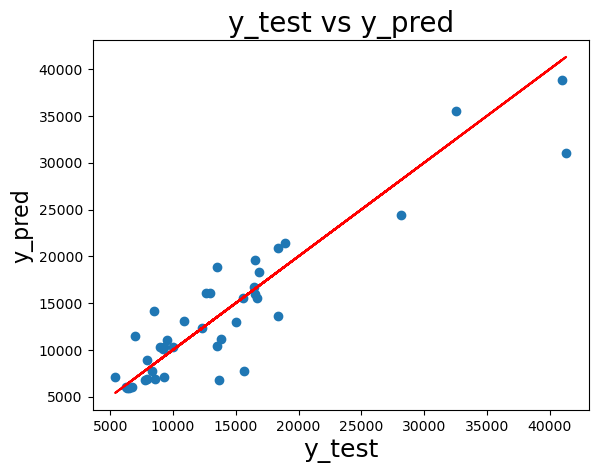

In [112]:
plt.scatter(y_test, y_pred)

plt.title('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="red")
plt.show()

### The scatter plot indicates that the predicted values closely match the actual values. The relationship between the actual scores and predicted scores appears to be almost perfectly linear.

# Conclusions

Following are the conclusions based on the models.

1. The p-values associated with all the coefficients are lower than the predetermined significance level of 0.05. This suggests that all the predictors in the model have a statistically significant relationship with the outcome variable.
2. The price of a car can be accurately predicted based on the significance of the following variables.

    -enginesize

    -carwidth

    -enginelocation_rear

    -CarCompany_bmw